In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline
from itertools import cycle

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


In [4]:
psy_test = df['Psychology_test'].values
psy_test

array([13, 14,  7, 12, 10,  6,  8, 15,  4, 14,  9,  6, 10, 12,  5, 12,  8,
        8, 12, 15])

$
帰無仮説 H0:\mu = 12\\
対立仮説 H1:\mu \neq 12
$

$ Z = \cfrac{\overline X - \mu}{\sigma / \sqrt{n}}$ を検定統計量とする。\
有意水準は5%, $\alpha = 0.05$

In [6]:
Z_upper = np.mean(psy_test) - 12
Z_upper

-2.0

In [7]:
Z_lower = np.sqrt(10/len(psy_test))
Z_lower

0.7071067811865476

In [8]:
Z = Z_upper / Z_lower
Z

-2.82842712474619

下側確率$ prob(Z \leqq z) $


In [22]:
# パーセント点を求める方法
# stats.norm.ppf(q = 0.025, loc = 0.0, scale = 1.0)# 上側確率はisf
print(stats.norm.ppf(0.025))
print(stats.norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


In [23]:
# p値を直接求める方法
stats.norm.cdf(x = -2.828427, loc = 0, scale = 1) #locは平均、scaleは標準偏差, xは上で言うところのz

0.0023388684020295768

In [26]:
stats.norm.sf(x = 2.828427, loc = 0, scale = 1)# 上側確率

0.0023388684020295768

In [27]:
2*stats.norm.sf(x = 2.828427)

0.0046777368040591535

## t分布

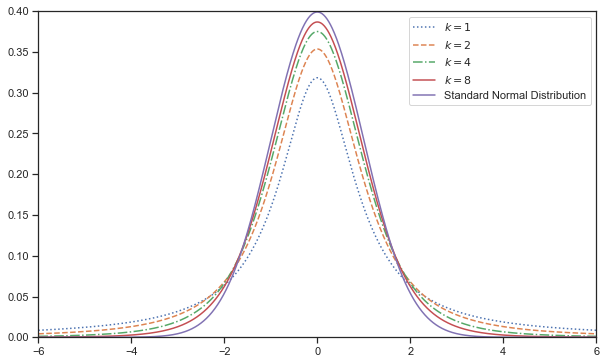

In [36]:
x = np.linspace(-6, 6, 1000)
fig,ax = plt.subplots(1, 1, figsize=(10, 6))

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 2, 4, 8]
for k, ls in zip(deg_of_freedom, linestyles):
    ax.plot(x, stats.t.pdf(x, k), linestyle=ls, label=r'$k=%i$' % k)

ax.plot(x, stats.norm.pdf(x, 0, 1), linestyle='-', label="Standard Normal Distribution")

plt.xlim(-6, 6)
plt.ylim(0, 0.4)

plt.legend()
plt.show()

In [37]:
t_upper = np.mean(psy_test) - 12
t_upper

-2.0

In [38]:
t_lower = np.std(psy_test, ddof=1) / np.sqrt(len(psy_test))
t_lower

0.7643366577077076

In [41]:
t = t_upper / t_lower
t

-2.616648017377738

In [42]:
# 自由度 df = n-1 = 20 - 1 = 19 のt分布に従う
stats.t.ppf(0.025, 19)

-2.0930240544082634

In [43]:
stats.t.ppf(0.975, 19)

2.093024054408263

In [44]:
stats.t.isf(0.025, 19)# = stats.t.ppf(0.975, 19)

2.0930240544082634

In [46]:
# p値を直接求める
stats.t.cdf(-2.616648, 19)

0.008485460450029377

In [49]:
stats.t.sf(2.616648, 19) * 2

0.016970920900058754

In [54]:
stats.ttest_ind(psy_test, np.array([12]*20))

Ttest_indResult(statistic=-2.616648017377738, pvalue=0.012672876709337434)

### 無相関検定

In [77]:
test1 = df['Statistics_test1']
test2 = df['Statistics_test2']

帰無仮説と対立仮説の設定\
$
帰無仮説 H_0 : \rho = 0 (母相関は0である)\\
対立仮説 H_1 : \rho \neq 0 (母相関は0ではない)
$

対立仮説より、両側検定となる

$
t = \cfrac{r \sqrt{n-2}}{\sqrt{1-r^2}}を検定統計量とする
$

In [80]:
samp_corr = np.corrcoef(test1, test2)[0][1]
samp_corr

0.7496589648242451

In [81]:
samp_size = 20

In [82]:
t_upper = samp_corr * np.sqrt(samp_size-2)
t_upper

3.180533625627067

In [84]:
t_lower = np.sqrt(1 - samp_corr**2)
t_lower

0.6618243244688436

In [86]:
t = t_upper / t_lower
t

4.80570675334372

In [87]:
print(stats.t.ppf(0.025, 18))
print(stats.t.ppf(0.975, 18))

-2.10092204024096
2.10092204024096


よって帰無仮説は棄却される

In [91]:
r, p = stats.pearsonr(test1, test2)
print(r)
print(p)

0.749658964824245
0.00014162288155448205


p値が0.05より小さいので帰無仮説は棄却される。

## カイ二乗検定
２つの質的変数が独立であるかどうかを確かめるために行うものが、独立性の検定

In [93]:
pd.crosstab(index=[df['Math']],columns=df['Statistics'], margins=True) 

Statistics,dislike,like,All
Math,,,
dislike,10,4,14
like,2,4,6
All,12,8,20


$
帰無仮説 H_0 : 2つの変数は独立\\
対立仮説 H_1 : 2つの変数には連関がある
$

統計検定料は$\chi^2$。\
$ \chi^2 = \cfrac{(O_1 - E_1)^2}{E_1} + \cfrac{(O_2 - E_2)^2}{E_2} + \cdots + \cfrac{(O_k - E_k)^2}{E_k}$

自由度は「(行の数-1) × (列の数-1)」で求められる。\
例題の場合、自由度df=1のカイ二乗分布に従う。

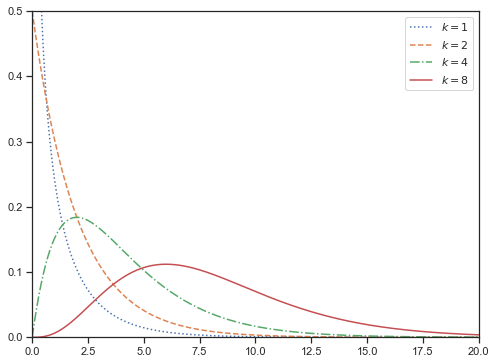

In [98]:
x = np.linspace(0, 20, 1000)
fig,ax = plt.subplots(1, 1, figsize=(8, 6))

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 2, 4, 8]
for k, ls in zip(deg_of_freedom, linestyles):
    ax.plot(x, stats.chi2.pdf(x, k), linestyle=ls, label=r'$k=%i$' % k)

plt.xlim(0, 20)
plt.ylim(0, 0.5)

plt.legend()
plt.show()

In [99]:
expected_frec_11 = 12*14/20
expected_frec_21 = 12*6/20
expected_frec_12 = 8*14/20
expected_frec_22 = 8*6/20

In [100]:
expected_frec = np.array([expected_frec_11, expected_frec_21, expected_frec_12, expected_frec_22])
expected_frec

array([8.4, 3.6, 5.6, 2.4])

In [101]:
observed_frec = np.array([10, 2, 4, 4])
observed_frec

array([10,  2,  4,  4])

In [102]:
chi_elements = (observed_frec - expected_frec)**2 / expected_frec
chi_elements

array([0.3047619 , 0.71111111, 0.45714286, 1.06666667])

In [103]:
chi = np.sum(chi_elements)
chi

2.5396825396825395

In [114]:
# 棄却域の計算(下側確率)
stats.chi2.ppf(0.95, 1)

3.841458820694124

In [115]:
# 上側確率
stats.chi2.isf(0.05, 1)

3.8414588206941285

In [118]:
# p値
stats.chi2.sf(2.539683, 1)

0.1110170731459138

In [121]:
1 - stats.chi2.cdf(2.539683, 1)

0.1110170731459138

In [139]:
# カイ二乗値とp値の計算
stats.chisquare(observed_frec, f_exp = expected_frec, ddof=2)# ddofの値に注意

Power_divergenceResult(statistic=2.5396825396825395, pvalue=0.1110171055121861)

### scipyでは一発でカイ二乗分布を計算できる

In [109]:
crossed = pd.crosstab(index=[df['Math']],columns=df['Statistics'])
x2, p, dof, expected = sp.stats.chi2_contingency(crossed, correction=False)# 連続値の補正をしないのでcorrection=False
print(f"カイ二乗値は {x2}")
print(f"確率は {p}")
print(f"自由度は {dof}")
print( expected )

カイ二乗値は 2.5396825396825395
確率は 0.1110171055121861
自由度は 1
[[8.4 5.6]
 [3.6 2.4]]


### サンプルサイズの影響

In [126]:
stats.chi2.isf(0.05, 1)

3.8414588206941285

棄却域は$ \chi^2 > 3.841459$

In [122]:
resume = pd.DataFrame([[16, 4],[12, 8]])
resume

,0,1
0,16,4
1,12,8


In [123]:
x2, p, dof, expected = sp.stats.chi2_contingency(resume, correction=False)
print(f"カイ二乗値は {x2}")
print(f"確率は {p}")
print(f"自由度は {dof}")
print( expected )

カイ二乗値は 1.9047619047619047
確率は 0.16754627748861328
自由度は 1
[[14.  6.]
 [14.  6.]]


In [127]:
resume2 = pd.DataFrame([[160, 40],[120, 80]])
resume2

,0,1
0,160,40
1,120,80


In [128]:
x2, p, dof, expected = sp.stats.chi2_contingency(resume2, correction=False)
print(f"カイ二乗値は {x2}")
print(f"確率は {p}")
print(f"自由度は {dof}")
print( expected )

カイ二乗値は 19.047619047619047
確率は 1.2749674921097076e-05
自由度は 1
[[140.  60.]
 [140.  60.]]


# 練習問題
#### 1

In [129]:
sample = np.array([165, 150, 170, 168, 159, 170, 167, 178, 155, 159,
                  161, 162, 166, 171, 155, 160, 168, 172, 155, 167])

帰無仮説:$\mu=170$、対立仮説:$\mu \neq 170$

In [133]:
# 母分散が未知なのでt分布を使用する
# 自由度は　n-1 = 20-1 = 19
print(stats.t.ppf(0.025, 19))
print(stats.t.ppf(0.975, 19))

-2.0930240544082634
2.093024054408263


In [132]:
t =  (np.mean(sample) - 170) / (np.var(sample, ddof=1)/len(sample))**0.5  
t

-3.8502858588965956

帰無仮説を棄却 -> $\mu \neq 170$ である\
無作為標本と考えてはいけない

#### 2

帰無仮説:$\rho = 0$(母相関は0)\
対立仮説:$\rho \neq 0$(母相関は0ではない)

In [134]:
StudyHours = np.array([1, 3, 10, 12, 6, 3, 8, 4, 1, 5])
ExamResult = np.array([20, 40, 100, 80, 50, 50, 70, 50, 10, 60])

p値が0.05より小さいので帰無仮説を棄却。独立ではない。つまり相関がある。

In [135]:
r, p = stats.pearsonr(StudyHours, ExamResult)
print(r)
print(p)

0.9092973987719787
0.0002650851355052368


In [150]:
samp_corr = np.corrcoef(StudyHours, ExamResult)[0][1]
samp_size = 10
t = samp_corr * np.sqrt(samp_size-2) / np.sqrt(1 - samp_corr**2)
print(t)

6.180224916880355


In [137]:
print(stats.t.ppf(0.025, 8))
print(stats.t.ppf(0.975, 8))

-2.306004135033371
2.3060041350333704


帰無仮説を棄却 -> 母相関は0ではない -> 相関がある

#### 3

In [143]:
# help(stats.spearmanr)

#### 4

In [142]:
FoodTendency = np.array(["洋食","和食","和食","洋食","和食","洋食","洋食","和食","洋食","洋食","和食",
                         "洋食","和食","洋食","和食","和食","洋食","洋食","和食","和食"])
                         
TasteTendency = np.array(["甘党","辛党","甘党","甘党","辛党","辛党","辛党","辛党","甘党","甘党","甘党",
                         "甘党","辛党","辛党","甘党","辛党","辛党","甘党","辛党","辛党"])

In [145]:
tendency = pd.crosstab(FoodTendency, TasteTendency)
tendency

col_0,甘党,辛党
row_0,,
和食,3,7
洋食,6,4


In [147]:
x2, p, dof, expected = sp.stats.chi2_contingency(tendency, correction=False)
print(f"カイ二乗値は {x2}")
print(f"p値(確率)は {p}")
print(f"自由度は {dof}")
print( expected )

カイ二乗値は 1.8181818181818183
p値(確率)は 0.17752985241214955
自由度は 1
[[4.5 5.5]
 [4.5 5.5]]


p値 >= 0.025なので帰無仮説が棄却されない。\
連関がない

#### 5

In [149]:
Kokugo = np.array([60,40,30,70,55])
Shakai = np.array([80,25,35,70,50])

In [158]:
r, p = stats.pearsonr(Kokugo, Shakai)
print(r)
print(p)

0.8412630177137491
0.07408497775131745


p値が0.05より大きいので帰無仮説を採択する。-> 母相関が0 -> 相関はない

In [155]:
Kokugo2 = np.array([60,40,30,70,55,60,40,30,70,55])
Shakai2 = np.array([80,25,35,70,50,80,25,35,70,50])

In [159]:
r, p = stats.pearsonr(Kokugo2, Shakai2)
print(r)
print(p)

0.841263017713749
0.0022828207300433175


p値が0.05より小さいので帰無仮説を棄却する。-> 母相関が0ではない -> 相関がある

## Rモジュールを使用
testメソッドがpythonになかったため
???
うまく値を代入できなかった。

In [75]:
import pyper

# R のインスタンスを作る
r = pyper.R(use_numpy='True', use_pandas='True')

# Python のオブジェクトを R に渡す
r.assign("ｐｓｙ", df['Psychology_test'])

# R のソースコードを実行する
r("psy")

"try({psy})\nError in try({ :  オブジェクト 'psy' がありません \n"

In [73]:
df['Psychology_test']

0     13
1     14
2      7
3     12
4     10
5      6
6      8
7     15
8      4
9     14
10     9
11     6
12    10
13    12
14     5
15    12
16     8
17     8
18    12
19    15
Name: Psychology_test, dtype: int64

In [59]:
r = pyper.R()

In [60]:
import pyper
r = pyper.R()
r("a <- 10")
print(r("a"))
# 結果
#　try({a})
#[1] 10

r("b <- 5")
print(r("a + b"))
# 結果
# try({a + b})
# [1] 15

try({a})
[1] 10

try({a + b})
[1] 15



In [ ]:
import pyper
import pandas as pd

# Python で CSV のデータを読み出す
wine = pd.read_csv("wine.csv")

# R のインスタンスを作る
r = pyper.R(use_pandas='True')

# Python のオブジェクトを R に渡す
r.assign("data", wine)

# R のソースコードを実行する
r("source(file='scatter.R')")